In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Urban_Sound/metadata/UrbanSound8K.csv")
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [5]:
audio_path = "/content/drive/MyDrive/Urban_Sound/audio/"
df['file_path'] = audio_path + 'fold' + df.fold.astype(str) + '/' + df['slice_file_name']

df['time'] = df['end'] - df['start']
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class,file_path,time
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,/content/drive/MyDrive/Urban_Sound/audio/fold5...,0.317551
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...,4.000000
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn,/content/drive/MyDrive/Urban_Sound/audio/fold1...,0.648525


In [6]:
def check_df(data, head=5):
    print("\n******Shape******")
    print(f'Shape     : {df.shape}\n'
          f'Size      : {df.size}\n'
          f'Dimension : {df.ndim}')
    print("\n******Types******")
    print(data.dtypes)
    print("\n******Head******")
    print(data.head(head))
    print("\n******Tail******")
    print(data.tail(head))
    print("\n******Random Sampling******")
    print(data.sample(head))
    print("\n******Missing Values******")
    print(data.isnull().sum())
    print("\n******Duplicated Values******")
    print(data.duplicated().sum())
    print("\n******Unique Values******")
    print(data.nunique())
    print("\n******Describe******")
    print(data.describe().T)

In [9]:
check_df(df)


******Shape******
Shape     : (8732, 10)
Size      : 87320
Dimension : 2

******Types******
slice_file_name     object
fsID                 int64
start              float64
end                float64
salience             int64
fold                 int64
classID              int64
class               object
file_path           object
time               float64
dtype: object

******Head******
      slice_file_name    fsID  start        end  salience  fold  classID             class                                          file_path      time
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3          dog_bark  /content/drive/MyDrive/Urban_Sound/audio/fold5...  0.317551
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2  children_playing  /content/drive/MyDrive/Urban_Sound/audio/fold5...  4.000000
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2  children_playing  /content/drive/MyDrive/Urban_Sound/audio/fold5...  4.0000

# VISUALIZATION

In [10]:
ordered_class = df.groupby('class').count().sort_values(by='class').index

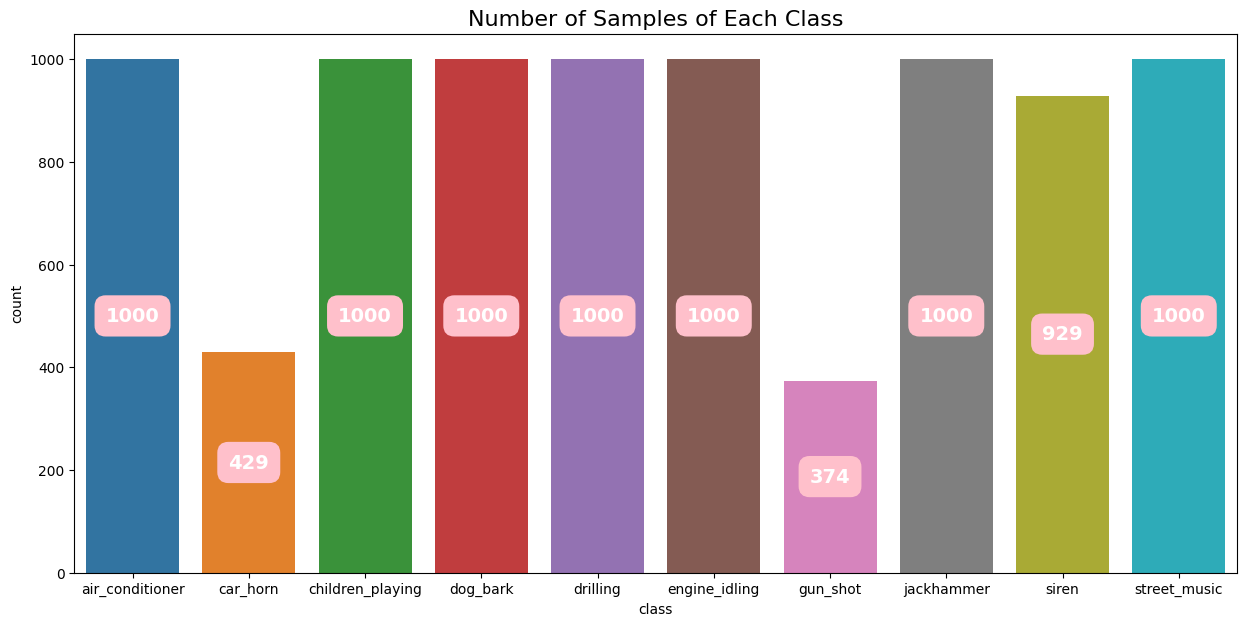

In [11]:
fig = plt.figure(figsize=(15, 7))
ax = sns.countplot(data = df, x = 'class', order = ordered_class)

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()),
            ha = 'center', va='center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))

plt.title('Number of Samples of Each Class',fontsize=16)
plt.show()

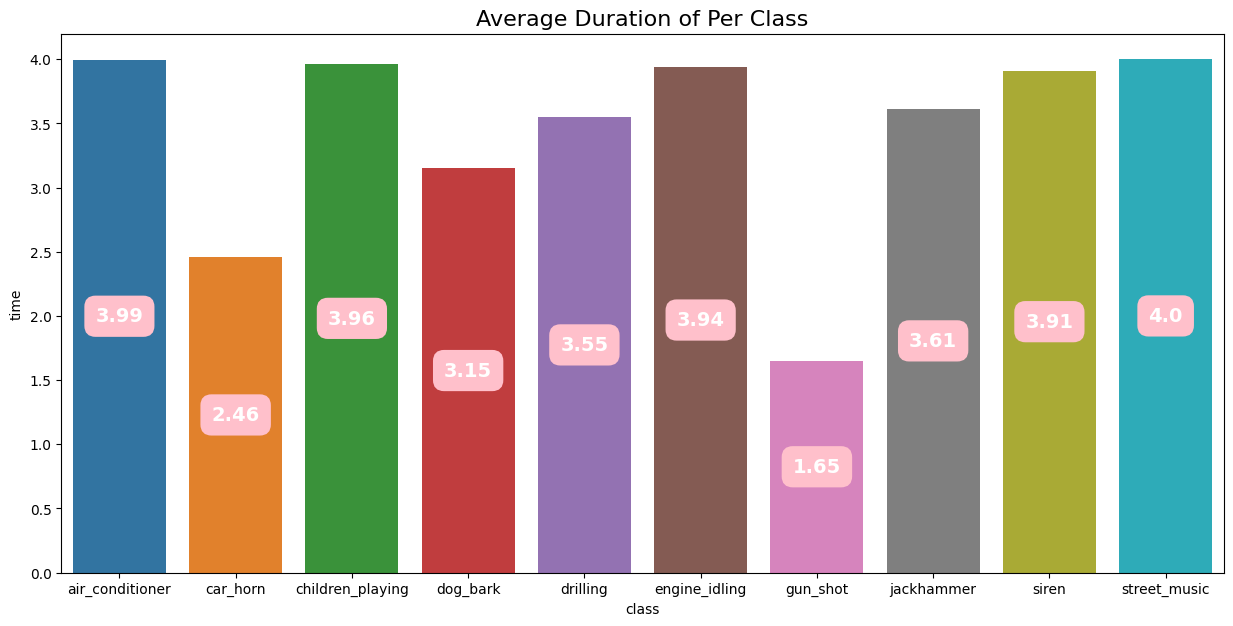

In [12]:
df_temp = df.groupby('class')['time'].mean().reset_index()
fig = plt.figure(figsize=(15, 7))

ax = sns.barplot(x=df_temp['class'], y=df_temp['time'],
                 data = df, order = ordered_class)

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),2)}",
            ha = 'center', va='center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))

plt.title('Average Duration of Per Class',fontsize=16)
plt.show()

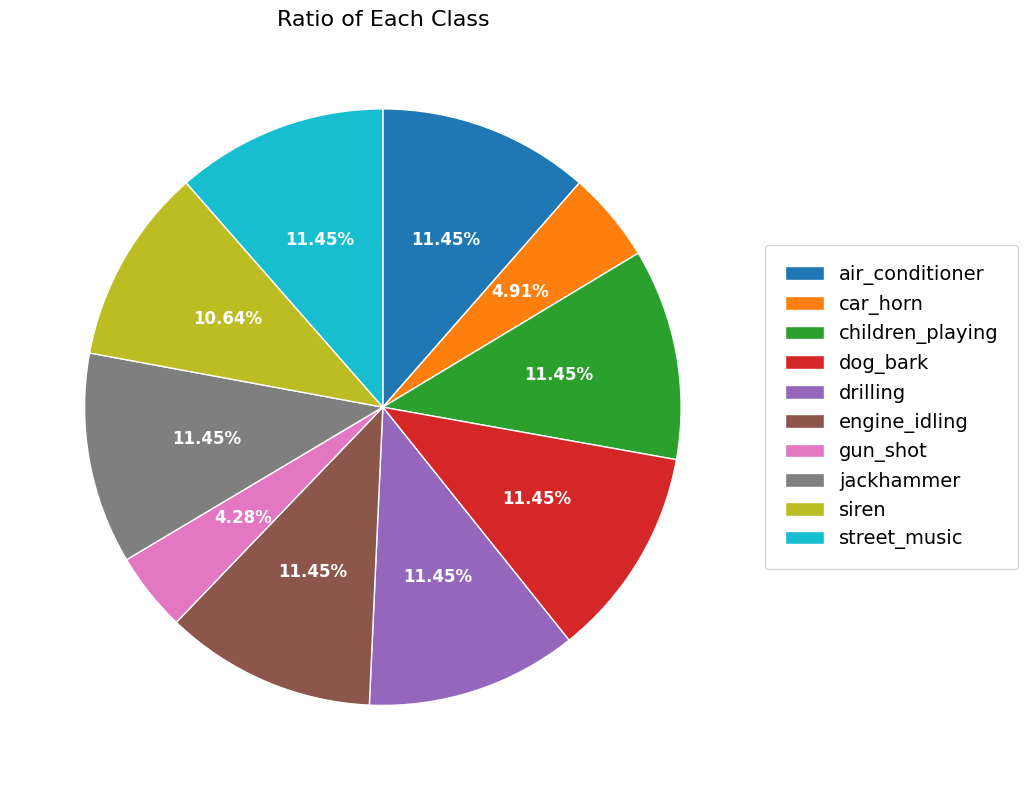

In [13]:
df_temp = df.groupby('class')['classID'].count().reset_index()

plt.figure(figsize=(20, 8))

patches, texts, autotexts = plt.pie(df_temp['classID'],
                                    wedgeprops = {'linewidth' : 1,
                                                  'edgecolor' : 'white' },
                                    autopct = '%.2f%%',
                                    labeldistance = 1.07,
                                    counterclock=False,
                                    startangle=-270)
plt.legend(df_temp['class'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), borderpad=1, fontsize=14)

plt.setp(autotexts, **{'color':'white', 'weight':'bold', 'fontsize':12})
plt.title('Ratio of Each Class',fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
df_temp = df.groupby('class').sample().reset_index()

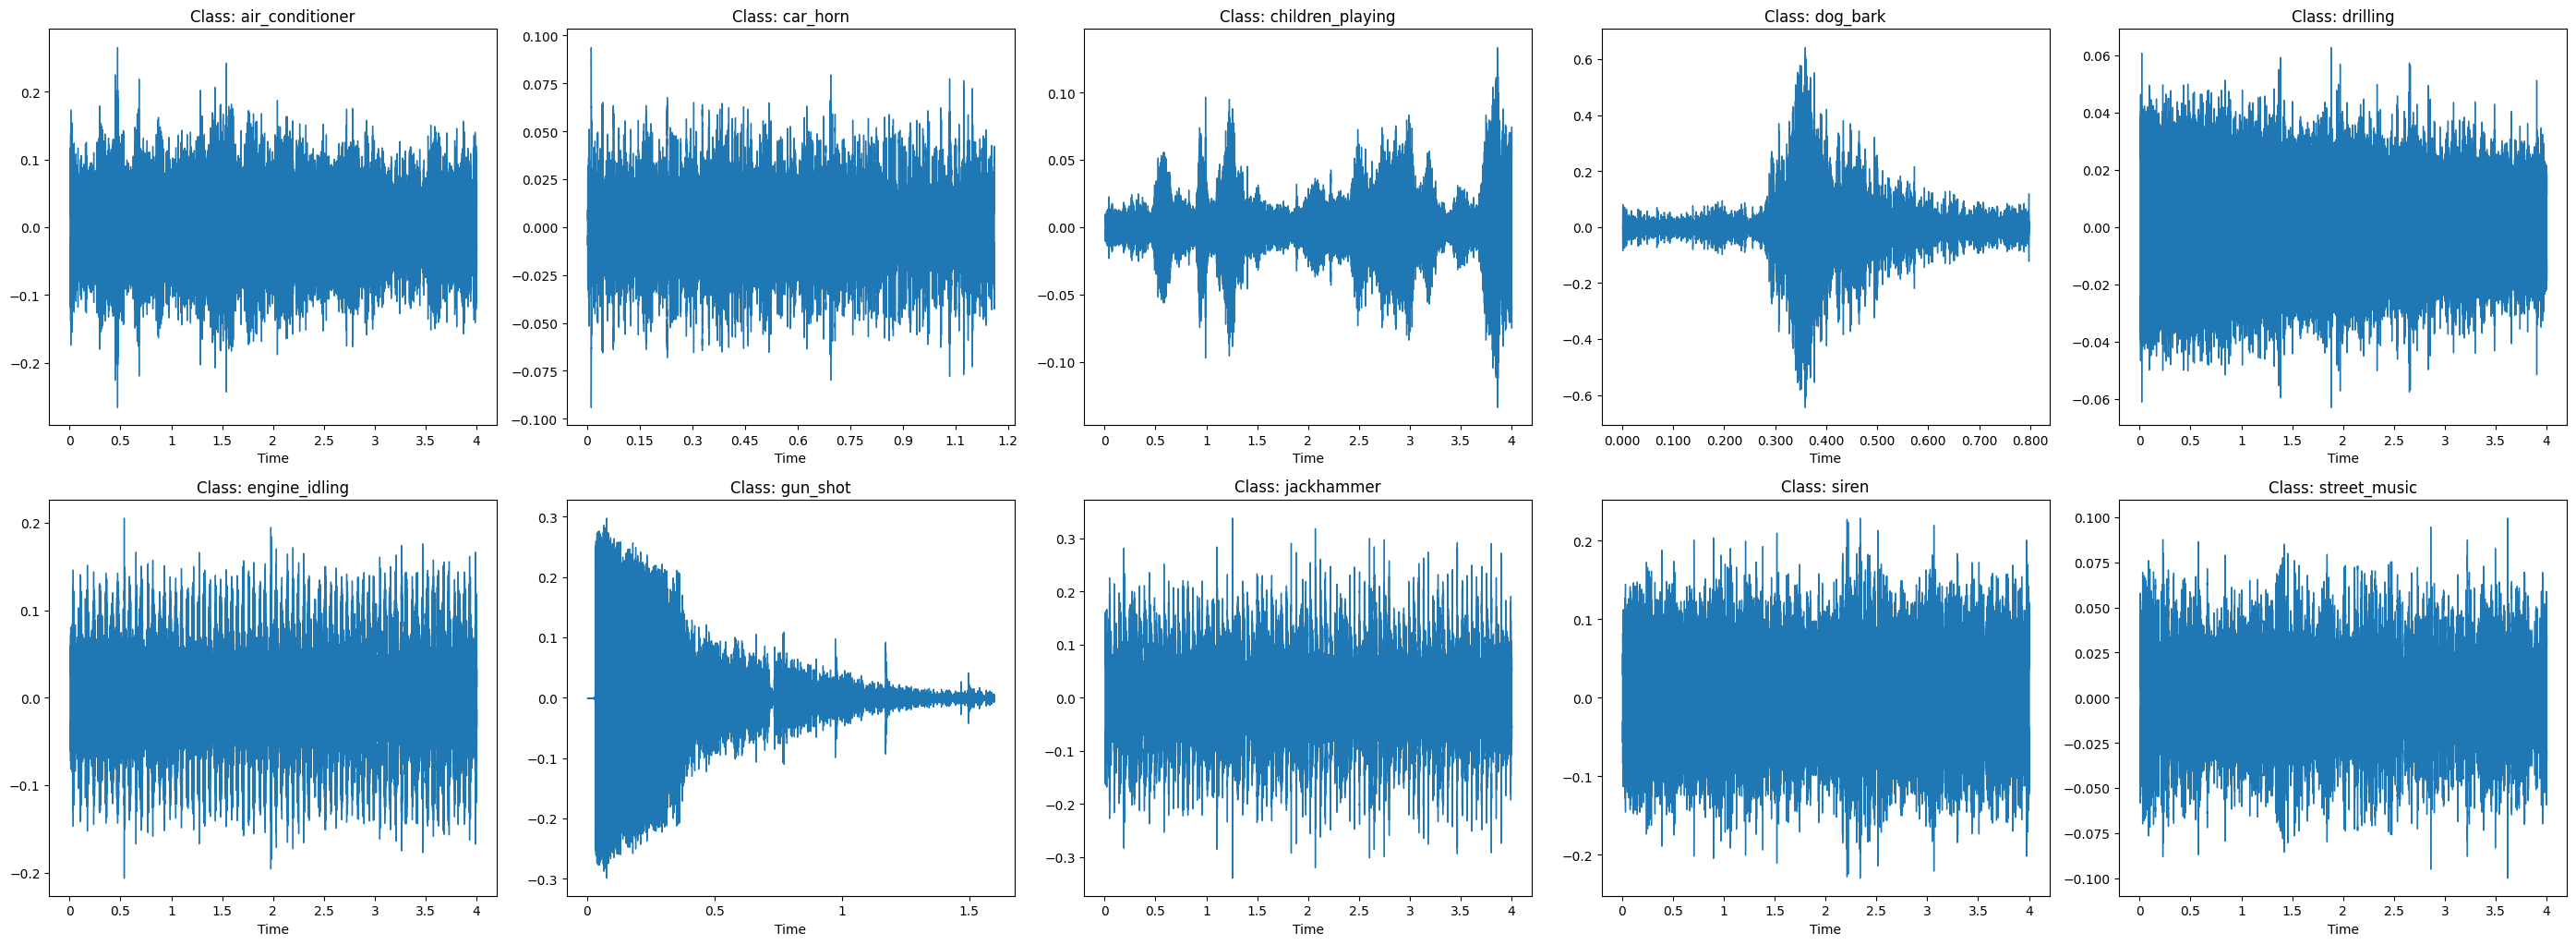

In [15]:
fig = plt.figure(figsize=(28, 15))

for i in range(len(df_temp)):
  #print(df_temp['file_path'][i])
  x, sr = librosa.load(df_temp['file_path'][i])
  plt.subplot(3,5,i+1)
  plt.title('Class: '+str(df_temp['class'][i]))
  librosa.display.waveshow(x, sr=sr)

plt.tight_layout()

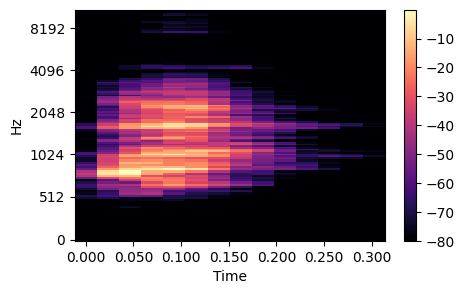

In [16]:
x, sr = librosa.load("/content/drive/MyDrive/Urban_Sound/audio/fold5/100032-3-0-0.wav")
X=librosa.feature.melspectrogram(y = x) #stft -> Short-time Fourier transform
Xdb=librosa.amplitude_to_db(X ,ref=np.max) #Genlikten Desibel değerine
plt.figure(figsize=(5,3))
librosa.display.specshow(Xdb,sr=sr,x_axis="time",y_axis="mel")
plt.colorbar()

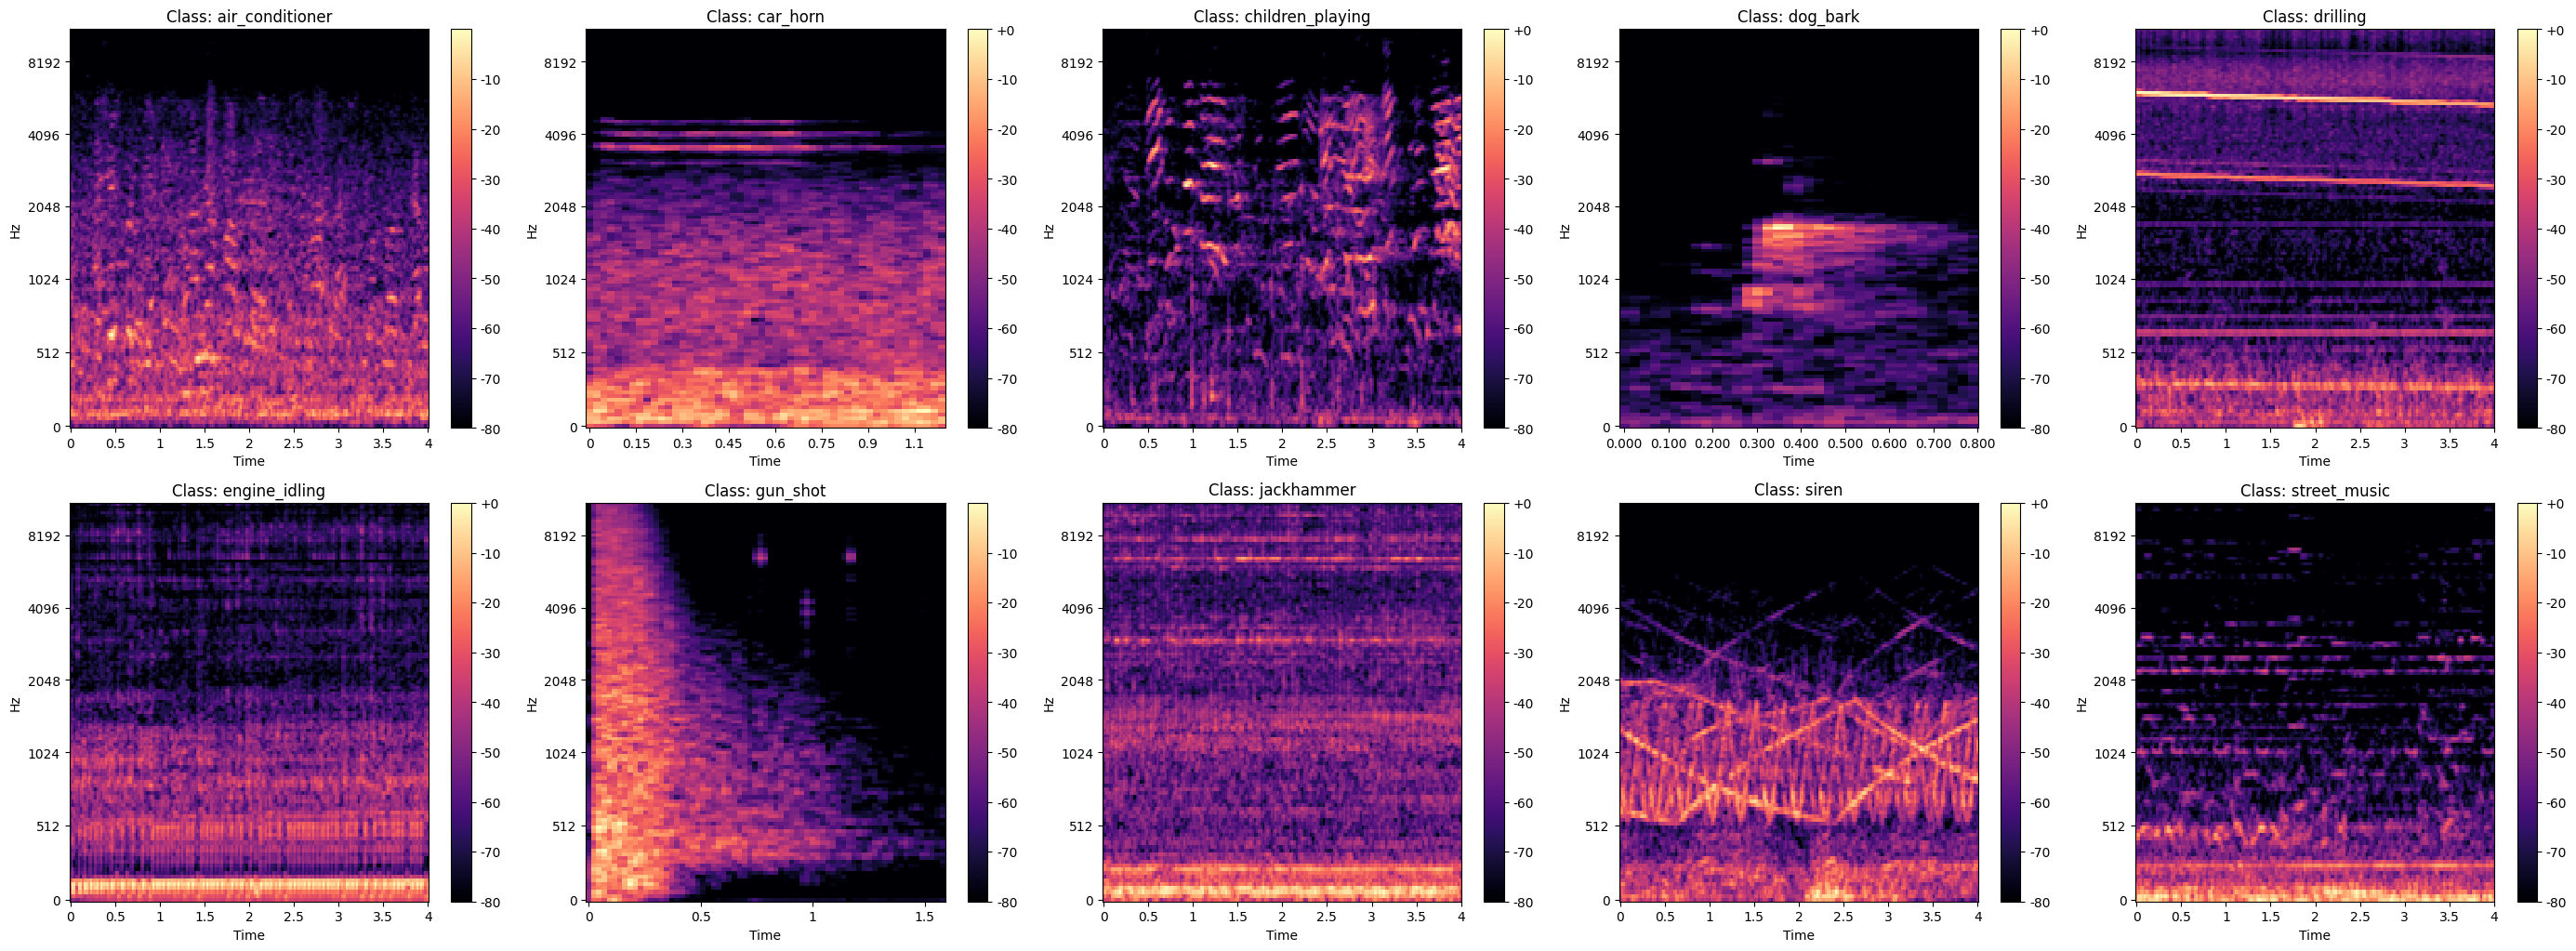

In [17]:
fig = plt.figure(figsize=(28, 15))

for i in range(len(df_temp)):
  x, sr = librosa.load(df_temp["file_path"][i])
  mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,
                                    fmax=8000)
  log_mel_spectrogram = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
  plt.subplot(3,5,i+1)
  librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
  plt.colorbar(format="%+2.f")
  plt.title('Class: '+str(df_temp['class'][i]))

plt.tight_layout()